In [72]:
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD

In [6]:
#This function takes a 3d array of (size along each dimension = N_side) poisson values of lamda = n_bar and the desired
# power spectrum pk_cl and returns another 3d array of the same dimension with the n(x) following pk_cl(k)

def GonzNuevo(box_p, N_side, n_bar, pk_cl, k_for_P):
    #Now let's get the density contrast
    box_delx = (box_p - n_bar)/n_bar

    #Now let's take the fourier transform of box_delx to get box_delk
    box_delk = np.fft.fftn(box_delx, norm='ortho')

    #Getting the corresponding k values along 1d axis
    k_vals = np.fft.fftfreq(N_side)    

    #Power spectrum of the Poisson field box_delx
    #First I create a 3d array of same shape as box_delk, with values equal
    #to |k| value corresponding to same position in box_delk.
    temb_mesh = np.meshgrid(k_vals, k_vals, k_vals, indexing='ij')
    modk_grid = np.sqrt(temb_mesh[0] ** 2 + temb_mesh[1] ** 2 + temb_mesh[2] ** 2)

    #Now let's iterate through the k_for_P and find the index of modk_grid with k
    #that falls between and find power spectrum pk.
    pk = np.zeros(len(k_for_P)-1)
    for i, (k1, k2) in enumerate(zip(k_for_P[:-1], k_for_P[1:])):
        pk[i] = np.average(np.absolute(box_delk[np.where((modk_grid > k1) & (modk_grid < k2))]) ** 2)

    #----------------------------------------------------------------------------------------------------
    #plotting the pks
    k_for_P_mid = (k_for_P[:-1] + k_for_P[1:])/2

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.plot(k_for_P_mid, pk)
    ax2.plot(k_for_P_mid, pk_cl)

    ax1.set_xlabel('k')
    ax1.set_ylabel(r'$P_{pois}(k)$')
    ax2.set_xlabel('k')
    ax2.set_ylabel(r'$P_{cl}(k)$')
    #----------------------------------------------------------------------------------------------------
    
    #Make a new delk.
    box_delk_new = np.copy(box_delk)

    #modify the delk using the chosen power spectrum
    for i, (k1, k2) in enumerate(zip(k_for_P[:-1], k_for_P[1:])):
        temp_ind = np.where((modk_grid > k1) & (modk_grid < k2))
        box_delk_new[temp_ind] = box_delk[temp_ind] * (np.sqrt(pk_cl[i] + pk[i])) / np.sqrt(pk[i])

    #Now we need to inverse fourier transfor box_delk_new to get box_delx_new
    box_delx_new = np.fft.ifftn(box_delk_new, norm='ortho')

    #Now to get the new n(x)
    box_GN = np.asarray(np.round(n_bar * (1 + box_delx_new)), dtype='int64')

    #-------------------------------------------------------------------------------------------------------
    #finding the new power spectrum
    pk_new = np.zeros(len(k_for_P)-1)
    for i, (k1, k2) in enumerate(zip(k_for_P[:-1], k_for_P[1:])):
        pk_new[i] = np.average(np.absolute(box_delk_new[np.where((modk_grid > k1) & (modk_grid < k2))]) ** 2)

    #plotting the new psd vs the given one
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.plot(k_for_P_mid, pk_new, label=r'$P_{new}(k)$')
    ax1.plot(k_for_P_mid, pk_cl, label=r'$P_{cl}(k)$')
    ax1.set_xlabel('k')
    ax1.set_ylabel(r'$P(k)$')
    ax1.legend()
    ax2.plot(k_for_P_mid, pk_new-pk_cl, label=r'$P_{new}(k) - P_{cl}(k)$')
    ax2.set_xlabel('k')
    ax2.legend()
    #-------------------------------------------------------------------------------------------------------

    return box_GN
    

/tmp/ipykernel_805372/2855386124.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  box_GN = np.asarray(np.round(n_bar * (1 + box_delx_new)), dtype='int64')


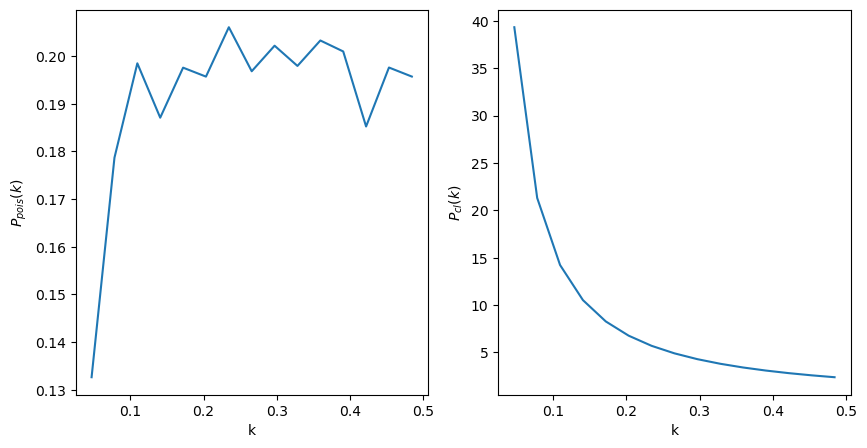

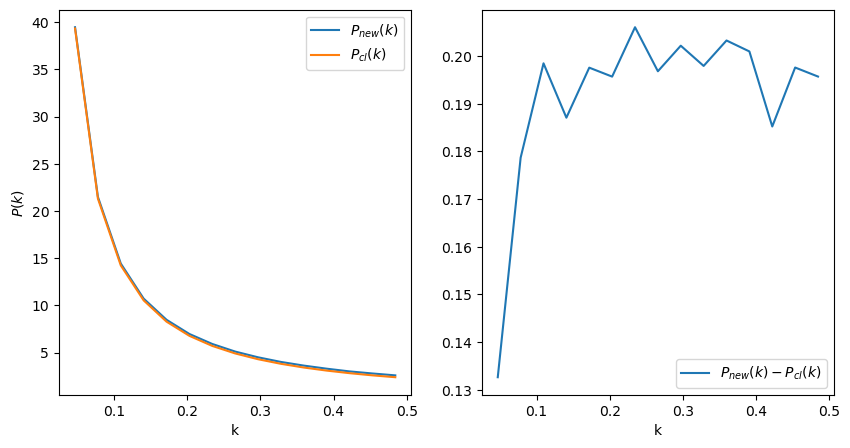

In [17]:
#Let's create a well defined box to hold the number of particles, box_p. 
N_side = 32
#Choose the mean number of particles, n_bar
n_bar = 5

#Populate box_p with number of particles drawn from Poisson with mean n_bar.
box_p = np.random.poisson(lam=n_bar, size=(N_side, N_side, N_side))

#Lets make the k's needed for the power spectrum.
k_min = 1/N_side
k_max = 1/2
assert (N_side % 2 == 0)
k_for_P = np.linspace(k_min, k_max, N_side//2)

#Now we have to make a desired power spectrum pk_cl
k_for_P_mid = (k_for_P[:-1] + k_for_P[1:])/2
pk_cl = np.power(k_for_P_mid, -1.2)

box_GN = GonzNuevo(box_p, N_side, n_bar, pk_cl, k_for_P)

## Validating the code

### Making different poisson arrays and obtaining its power spectrum

Text(0, 0.5, '$P_{pois}(k)$')

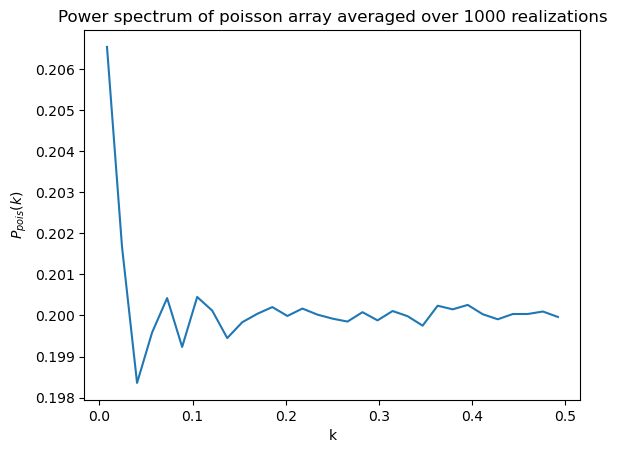

In [63]:
#Let's create a well defined box to hold the number of particles, box_p. 
N_side = 64
#Choose the mean number of particles, n_bar
n_bar = 5

#Lets make the k's needed for the power spectrum.
k_min = 0 #1/N_side
k_max = 1/2
assert (N_side % 2 == 0)
k_for_P = np.linspace(k_min, k_max, N_side//2)

#Now we have to make a desired power spectrum pk_cl
k_for_P_mid = (k_for_P[:-1] + k_for_P[1:])/2

def temp_func(box_p):

    #Now let's get the density contrast
    box_delx = (box_p - n_bar)/n_bar

    #Now let's take the fourier transform of box_delx to get box_delk
    box_delk = np.fft.fftn(box_delx, norm='ortho')

    #Getting the corresponding k values along 1d axis
    k_vals = np.fft.fftfreq(N_side)    

    #Power spectrum of the Poisson field box_delx
    #First I create a 3d array of same shape as box_delk, with values equal
    #to |k| value corresponding to same position in box_delk.
    temb_mesh = np.meshgrid(k_vals, k_vals, k_vals, indexing='ij')
    modk_grid = np.sqrt(temb_mesh[0] ** 2 + temb_mesh[1] ** 2 + temb_mesh[2] ** 2)

    #Temporary start
    # print(np.sum(box_delx)/(np.sqrt(N_side) ** 3))
    # print(box_delk[np.where(modk_grid==0)])
    #Temporary end

    #Now let's iterate through the k_for_P and find the index of modk_grid with k
    #that falls between and find power spectrum pk.
    pk = np.zeros(len(k_for_P)-1)
    for i, (k1, k2) in enumerate(zip(k_for_P[:-1], k_for_P[1:])):
        pk[i] = np.average(np.absolute(box_delk[np.where((modk_grid > k1) & (modk_grid < k2))]) ** 2)
        #print("Between ",k1, " and ", k2, "midpoint = ", len(np.where((modk_grid > k1) & (modk_grid < k2))[0])/(((k1 + k2)/2)**2), ", there are ", len(np.where((modk_grid > k1) & (modk_grid < k2))[0]), " k vectors.")

    return pk

fig, ax1 = plt.subplots()
ax1.set_title("Power spectrum of poisson array averaged over 1000 realizations")

pk = np.zeros_like(k_for_P_mid)
iter_num = 1000

for i in range(iter_num):
    #Populate box_p with number of particles drawn from Poisson with mean n_bar.
    box_p = np.random.poisson(lam=n_bar, size=(N_side, N_side, N_side))

    pk += temp_func(box_p)

pk /= iter_num
ax1.plot(k_for_P_mid, pk)

ax1.set_xlabel('k')
ax1.set_ylabel(r'$P_{pois}(k)$')
    #print(pk[0])

In [ ]:
#Here i am gonna look at why there is too much fluctuation at low k's.

## Let me find the correlation function of box_delx

In [115]:
#Let's create a well defined box to hold the number of particles, box_p. 
N_side = 32
#Choose the mean number of particles, n_bar
n_bar = 5

#Populate box_p with number of particles drawn from Poisson with mean n_bar.
box_p = np.random.poisson(lam=n_bar, size=(N_side, N_side, N_side))

#Lets make the k's needed for the power spectrum.
k_min = 1/N_side
k_max = 1/2
assert (N_side % 2 == 0)
k_for_P = np.linspace(k_min, k_max, N_side//2)

#Now we have to make a desired power spectrum pk_cl
k_for_P_mid = (k_for_P[:-1] + k_for_P[1:])/2
pk_cl = np.power(k_for_P_mid, -1.2)

box_GN = GonzNuevo(box_p, N_side, n_bar, pk_cl, k_for_P);
plt.close('all')

/tmp/ipykernel_805372/2855386124.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  box_GN = np.asarray(np.round(n_bar * (1 + box_delx_new)), dtype='int64')


In [125]:
#Here I am finding the correlation function of the box. I use the Corrfunc's DD function. I give all the pixel positions
#as the cartesian positin of points. The n(x) at the site is given as weights.
bins = np.arange(N_side)
x1, y1, z1 = np.asarray(np.meshgrid(np.arange(N_side), np.arange(N_side), np.arange(N_side)), dtype='float')
x1 = x1.flatten()
y1 = y1.flatten()
z1 = z1.flatten()
weights = box_p.flatten()
result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = x1, Y1 = y1, Z1 = z1, weights1=weights, periodic=False, output_ravg=True)


Text(0.5, 0, 'r')

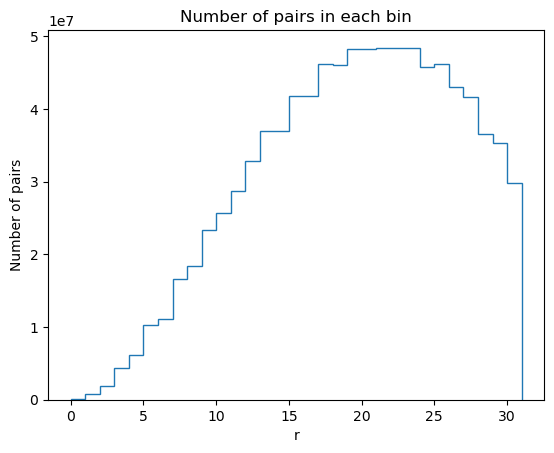

In [134]:
fig, ax = plt.subplots()
ax.stairs(result_DD['npairs'], edges=bins)
ax.set_title('Number of pairs in each bin')
ax.set_ylabel('Number of pairs')
ax.set_xlabel('r')

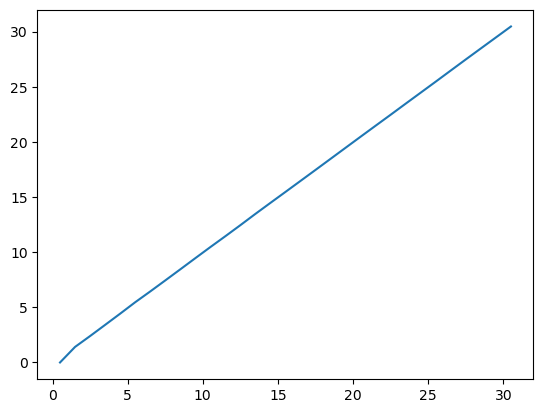

In [135]:
fig, ax = plt.subplots()
ax.plot((result_DD['rmin'] + result_DD['rmax'])/2, result_DD['ravg'])